#### Machine Hack Predict News Category Hackathon
**Link:**https://machinehack.com/hackathons/predict_the_news_category_hackathon/overview

### Import Necessary Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#### Import Data

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')

test_df = pd.read_excel('Data_Test.xlsx')

sample_df = pd.read_excel('Sample_submission.xlsx')

In [3]:
train_df[train_df['STORY'].duplicated()]

,STORY,SECTION
348,This story has been published from a wire agen...,3
463,This story has been published from a wire agen...,3
587,"Facebook, WhatsApp and Twitter have overhauled...",1
757,We will leave no stone unturned to make the au...,2
835,This story has been published from a wire agen...,1
...,...,...
7453,"The whole feels like a giant set, stately and ...",2
7462,"""Monsters at Work,"" a series inspired by Pixar...",1
7465,Commenting on the upcoming Amazon summer sale ...,1
7474,Congress says it needs to verify whether there...,0


In [4]:
train_df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [5]:
train_df[train_df['SECTION']==1]['STORY']

3       If you want to answer any question, click on ‘...
5       BEIJING: Chinese tech giant Huawei has announc...
10      “One would think that their development and te...
12      Xiaomi, however, sees the presence of Jio in r...
13      The ad reads "No bells & whistles. No Bezel. N...
                              ...                        
7617    Sure, the others are slightly faster, have sli...
7618    With up to 14.7 million pixels, one billion co...
7621    However, as of now, there is no confirmation a...
7622    In terms of optics, the back of the Redmi Note...
7625    The database has been created after bringing t...
Name: STORY, Length: 2772, dtype: object

In [6]:
train_df['Story_len'] = train_df['STORY'].apply(lambda x : len(x))

In [7]:
train_df.Story_len

0        843
1        129
2        386
3        587
4        299
        ... 
7623     394
7624     136
7625     484
7626    1927
7627     286
Name: Story_len, Length: 7628, dtype: int64

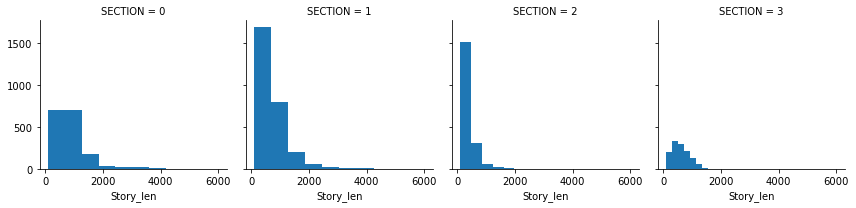

In [24]:
g = sns.FacetGrid(train_df,col='SECTION')
g.map(plt.hist,'Story_len')

In [26]:
train_df.groupby('SECTION').mean()

,Story_len
SECTION,
0,891.572954
1,725.632756
2,359.120062
3,611.605939


In [8]:
X = train_df['STORY']
y = train_df['SECTION']

X_pred = test_df

In [9]:
train_df['Source'] = 'Train'

test_df['Source'] = 'Test'

In [10]:
df = pd.concat([train_df, test_df])

In [11]:
df[7628:]

,STORY,SECTION,Story_len,Source
0,2019 will see gadgets like gaming smartphones ...,NaN,NaN,Test
1,It has also unleashed a wave of changes in the...,NaN,NaN,Test
2,It can be confusing to pick the right smartpho...,NaN,NaN,Test
3,The mobile application is integrated with a da...,NaN,NaN,Test
4,We have rounded up some of the gadgets that sh...,NaN,NaN,Test
...,...,...,...,...
2743,"According to researchers, fraud in the mobile ...",NaN,NaN,Test
2744,The iPhone XS and XS Max share the Apple A12 c...,NaN,NaN,Test
2745,"On the photography front, the Note 5 Pro featu...",NaN,NaN,Test
2746,UDAY mandated that discoms bring the gap betwe...,NaN,NaN,Test


In [12]:
#train_data
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

def vectorizer(vector, X):
    vc = vector().fit_transform(X)
    return vc

def split(vc,y):
    train = vc[:7628]
    test = vc[7628:]
    X_train,X_test,y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=123)
    
    return X_train,X_test,y_train, y_test,test
    
def predictions(model,vector, X, y):
    
    X_vector = vectorizer(vector, X)
    
    X_train,X_test,y_train, y_test, test_df= split(X_vector, y)
    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    actual = [y_train, y_test]
    pred = [train_pred, test_pred]
    text = ('Train', 'Test')
    for i in range(2):
        print(f"-----{text[i]}-----")
        metrics(actual[i], pred[i])
        
#______#
    
    final_pred = model.predict(test_df)
    
    return final_pred

In [65]:
nb = MultinomialNB()

In [178]:
#Multinomial Naive Bayes and Count_Vectorizer
test_pred = predictions(nb, CountVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1177   10    2    6]
 [  16 1919    4   14]
 [  32   11 1284    0]
 [   2    3    0  859]]


Accuracy Score:
 0.9812699007304738


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1195
           1       0.99      0.98      0.99      1953
           2       1.00      0.97      0.98      1327
           3       0.98      0.99      0.99       864

    accuracy                           0.98      5339
   macro avg       0.98      0.98      0.98      5339
weighted avg       0.98      0.98      0.98      5339

-----Test-----
Confusion Matrix:
 [[477  10   3   1]
 [  4 801   3  11]
 [ 27  14 555   1]
 [  1   7   0 374]]


Accuracy Score:
 0.9641764962865881


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       491
           1       0.96      0.98      0.97       819
           2       0.99      0.93

In [181]:
sample_df['SECTION'] = test_pred

sample_df.to_csv('Pred_nb_count_vc.csv', index=False)

In [184]:
#Multinomial Naive Bayes and TfidVectorizer
test_pred_tfid = predictions(nb, TfidfVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1146   46    2    1]
 [   4 1947    1    1]
 [  25   92 1210    0]
 [   3  136    0  725]]


Accuracy Score:
 0.9417493912717737


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1195
           1       0.88      1.00      0.93      1953
           2       1.00      0.91      0.95      1327
           3       1.00      0.84      0.91       864

    accuracy                           0.94      5339
   macro avg       0.96      0.93      0.94      5339
weighted avg       0.95      0.94      0.94      5339

-----Test-----
Confusion Matrix:
 [[455  35   1   0]
 [  0 818   1   0]
 [ 19  92 486   0]
 [  3  91   0 288]]


Accuracy Score:
 0.8942769768457842


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       491
           1       0.79      1.00      0.88       819
           2       1.00      0.81

In [190]:
sample_df['SECTION'] = test_pred_tfid

sample_df.to_csv('Pred_nb_tfid_vc1.csv', index=False)

In [111]:
lg = LogisticRegression(max_iter=500)

In [187]:
#Logistics Regression and HashingVectorizer

test_pred_log1 = predictions(lg, HashingVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1128   32   26    9]
 [   7 1918   13   15]
 [  17   11 1299    0]
 [   5   20    8  831]]


Accuracy Score:
 0.9694699381906724


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1195
           1       0.97      0.98      0.98      1953
           2       0.97      0.98      0.97      1327
           3       0.97      0.96      0.97       864

    accuracy                           0.97      5339
   macro avg       0.97      0.97      0.97      5339
weighted avg       0.97      0.97      0.97      5339

-----Test-----
Confusion Matrix:
 [[437  27  24   3]
 [  4 793  11  11]
 [  9  12 574   2]
 [  3  19   8 352]]


Accuracy Score:
 0.9418960244648318


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       491
           1       0.93      0.97      0.95       819
           2       0.93      0.96

In [191]:
sample_df['SECTION'] = test_pred_log1

sample_df.to_csv('Pred_lg_hash_2.csv', index=False)

In [182]:
test_pred_log = predictions(lg, CountVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1191    4    0    0]
 [   0 1953    0    0]
 [   0    0 1327    0]
 [   0   10    0  854]]


Accuracy Score:
 0.9973777861022664


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       0.99      1.00      1.00      1953
           2       1.00      1.00      1.00      1327
           3       1.00      0.99      0.99       864

    accuracy                           1.00      5339
   macro avg       1.00      1.00      1.00      5339
weighted avg       1.00      1.00      1.00      5339

-----Test-----
Confusion Matrix:
 [[452  15  24   0]
 [  4 790  18   7]
 [  5   6 585   1]
 [  3   9  10 360]]


Accuracy Score:
 0.9554390563564875


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       491
           1       0.96      0.96      0.96       819
           2       0.92      0.98

In [183]:
sample_df['SECTION'] = test_pred_log

sample_df.to_csv('Pred_log_count_vc.csv', index=False)

In [189]:
#Logistics Regression and Tfid Vectorizer

test_pred_tfid = predictions(lg, TfidfVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1162   15   11    7]
 [   2 1935    5   11]
 [   9    0 1318    0]
 [   1    4    1  858]]


Accuracy Score:
 0.9876381344821128


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1195
           1       0.99      0.99      0.99      1953
           2       0.99      0.99      0.99      1327
           3       0.98      0.99      0.99       864

    accuracy                           0.99      5339
   macro avg       0.99      0.99      0.99      5339
weighted avg       0.99      0.99      0.99      5339

-----Test-----
Confusion Matrix:
 [[448  23  19   1]
 [  0 802   9   8]
 [  8   7 581   1]
 [  1  11   7 363]]


Accuracy Score:
 0.9584971603320227


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       491
           1       0.95      0.98      0.97       819
           2       0.94      0.97

In [192]:
sample_df['SECTION'] = test_pred_tfid

sample_df.to_csv('Pred_lg_tfid.csv', index=False)

#### Decision tree

In [15]:
dtree = DecisionTreeClassifier()

test_pred=predictions(dtree, CountVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1191    4    0    0]
 [   0 1953    0    0]
 [   0    0 1327    0]
 [   0   10    0  854]]


Accuracy Score:
 0.9973777861022664


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       0.99      1.00      1.00      1953
           2       1.00      1.00      1.00      1327
           3       1.00      0.99      0.99       864

    accuracy                           1.00      5339
   macro avg       1.00      1.00      1.00      5339
weighted avg       1.00      1.00      1.00      5339

-----Test-----
Confusion Matrix:
 [[410  35  38   8]
 [ 11 698  58  52]
 [ 20  47 516  14]
 [ 18  51  22 291]]


Accuracy Score:
 0.836609873307121


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       491
           1       0.84      0.85      0.85       819
           2       0.81      0.86 

In [16]:
test_pred

array([1, 3, 1, ..., 1, 3, 1])

In [17]:
sample_df['SECTION'] = test_pred

sample_df.to_csv('Dtree_count_vc.csv', index=False)

In [18]:
test_pred=predictions(dtree, TfidfVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1191    4    0    0]
 [   0 1953    0    0]
 [   0    0 1327    0]
 [   0   10    0  854]]


Accuracy Score:
 0.9973777861022664


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       0.99      1.00      1.00      1953
           2       1.00      1.00      1.00      1327
           3       1.00      0.99      0.99       864

    accuracy                           1.00      5339
   macro avg       1.00      1.00      1.00      5339
weighted avg       1.00      1.00      1.00      5339

-----Test-----
Confusion Matrix:
 [[409  29  42  11]
 [ 16 706  46  51]
 [ 14  44 528  11]
 [ 14  60  22 286]]


Accuracy Score:
 0.8427260812581914


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       491
           1       0.84      0.86      0.85       819
           2       0.83      0.88

In [19]:
sample_df['SECTION'] = test_pred

sample_df.to_csv('Dtree_tfid_vc.csv', index=False)

#### Random Forest

In [20]:
rf = RandomForestClassifier()

test_pred=predictions(rf, TfidfVectorizer, df['STORY'], y)

-----Train-----
Confusion Matrix:
 [[1191    4    0    0]
 [   0 1953    0    0]
 [   0    0 1327    0]
 [   0   10    0  854]]


Accuracy Score:
 0.9973777861022664


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       0.99      1.00      1.00      1953
           2       1.00      1.00      1.00      1327
           3       1.00      0.99      0.99       864

    accuracy                           1.00      5339
   macro avg       1.00      1.00      1.00      5339
weighted avg       1.00      1.00      1.00      5339

-----Test-----
Confusion Matrix:
 [[436  26  29   0]
 [  2 782  29   6]
 [ 13  10 574   0]
 [  8  25  16 333]]


Accuracy Score:
 0.928352992573176


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       491
           1       0.93      0.95      0.94       819
           2       0.89      0.96 

In [21]:
sample_df['SECTION'] = test_pred

sample_df.to_csv('rf_tfid_vc.csv', index=False)

#### XG Boost

In [22]:
xgb = XGBClassifier()

test_pred=predictions(xgb, TfidfVectorizer, df['STORY'], y)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----Train-----
Confusion Matrix:
 [[1191    4    0    0]
 [   0 1953    0    0]
 [   0    0 1327    0]
 [   0   10    0  854]]


Accuracy Score:
 0.9973777861022664


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       0.99      1.00      1.00      1953
           2       1.00      1.00      1.00      1327
           3       1.00      0.99      0.99       864

    accuracy                           1.00      5339
   macro avg       1.00      1.00      1.00      5339
weighted avg       1.00      1.00      1.00      5339

-----Test-----
Confusion Matrix:
 [[442  28  18   3]
 [  3 777  23  16]
 [ 12  13 571   1]
 [  4  18  11 349]]


Accura

In [ ]:
sample_df['SECTION'] = test_pred

sample_df.to_csv('xgb_tfid_vc.csv', index=False)